# Exploratory Data Analysis (EDA)

## Introduction

This notebook focuses on performing **Exploratory Data Analysis (EDA)** on student performance data from the **Atlanta Public Schools (APS)** system. The goal is to gain insights into how students are performing across various grades and subjects, identify learning gaps, and segment students by performance levels to guide future interventions.

### Context:

In the previous phase of this project, the dataset was carefully cleaned and prepared for analysis. Key tasks during data preparation included:
1. **Resolving Merged Cells**: The dataset contained merged cells that were flattened and cleaned to create structured column names.
2. **Handling Missing Values**: Placeholder values like `--` were replaced with `NaN` (Not a Number) for consistency.
3. **Converting Data Types**: Performance metrics such as percentages and scale scores were converted to numeric types for analysis.
4. **Removing Unnecessary Columns**: Redundant or irrelevant columns were removed to streamline the dataset.

If you would like to review the data cleaning phase in detail, you can refer to the previous notebook, which covers all the necessary steps.

### Objective of this Phase:

The purpose of this phase is to explore the cleaned dataset through descriptive statistics and visualizations. By performing EDA, we aim to:
1. **Summarize Student Performance**: Calculate summary statistics for key performance metrics such as Mean Scale Scores and proficiency levels.
2. **Identify Learning Gaps**: Explore trends and patterns in the data to identify students who are performing below grade level.
3. **Segment Students by Performance Levels**: Group students into categories such as **Below Grade Level**, **Developing Learner**, and **Proficient Learner**, based on their performance in subjects like English Language Arts (ELA) and Mathematics.
4. **Prepare for Modeling**: Use the insights gained from EDA to inform the development of a recommendation engine that suggests personalized learning resources for students.

### Data Overview:

The dataset contains the following key metrics for students across different grades:
- **Number Tested**: The number of students tested in each subject and grade.
- **Mean Scale Scores**: The average performance of students in subjects like ELA and Mathematics.
- **Proficiency Levels**: The percentage of students at or above grade-level proficiency and those below grade level.
- **System Name**:


## Descriptive Statistics 

## Summary Statistics and Their Relevance to the Comparative Analysis

### Purpose of Summary Statistics:
In order to gain a high-level understanding of the data, I used summary statistics (such as mean, median, and standard deviation) to describe the distribution of key metrics within each dataset. This process is crucial because it provides a quantitative summary of the performance of students across various grade levels.

### Why Summary Statistics Are Important:
1. **Understanding Data Distribution**: Summary statistics help to quickly understand the overall performance trends for APS and non-APS students. Metrics like mean scale scores or proficiency levels reveal how students are performing on average.
2. **Identifying Variability**: The standard deviation shows how spread out student performance is, which is useful for identifying whether certain systems or groups have more students performing far below or above the average.
3. **Benchmarking Performance**: By comparing the summary statistics for APS to other systems, we can establish benchmarks for improvement and identify areas that may need targeted interventions (e.g., students with below-average proficiency in reading).

### Code Explanation:
The code I ran loads the cleaned data for grades 3, 4, 5, 6, 7, and 8 and calculates summary statistics for each sheet. This process provides a snapshot of key performance indicators like:
- Mean and median scale scores for English Language Arts.
- The percentage of students performing below, at, or above grade level.

These statistics are essential for understanding how APS students are performing relative to non-APS students, which will inform the development of the recommendation engine.



In [24]:
import pandas as pd

# List of cleaned sheet names to load
sheet_names = ['System - Grade 3', 'System - Grade 4', 'System - Grade 5', 'System - Grade 6', 'System - Grade 7', 'System - Grade 8']  # Add more sheet names if needed

# Initialize a dictionary to store the loaded DataFrames
cleaned_sheets = {}

# Loop through the list of sheet names and load each cleaned CSV file
for sheet in sheet_names:
    file_path = f'{sheet}_cleaned.csv'  # Adjust the file path if necessary
    cleaned_sheets[sheet] = pd.read_csv(file_path)

# Perform Descriptive Statistics for each sheet
for sheet, df in cleaned_sheets.items():
    print(f"Summary statistics for {sheet}:")
    print(df.describe())



Summary statistics for System - Grade 3:
       Reading Status^ Number Tested  \
count                     219.000000   
mean                      566.972603   
std                      1303.627497   
min                         6.000000   
25%                        79.500000   
50%                       199.000000   
75%                       456.500000   
max                     13095.000000   

       Reading Status^ % Below Grade Level (Lexile < 520L)  \
count                                         217.000000     
mean                                           37.449528     
std                                            13.570688     
min                                             8.275862     
25%                                            27.934272     
50%                                            36.501377     
75%                                            46.153846     
max                                            81.395349     

       Reading Status^ % Grade Level  o

## Comparative Analysis: APS vs. Non-APS

The goal of this comparative analysis is to understand how Atlanta Public Schools (APS) students are performing in comparison to students from other systems. By analyzing key performance metrics such as English Language Arts scale scores and proficiency levels, we aim to identify potential performance gaps between APS and non-APS students.

### Why This Analysis is Important:
- **APS Focus**: Atlanta Public Schools is the focus of this project, and understanding how its students perform compared to others can highlight areas that need improvement.
- **Targeted Interventions**: The comparison allows us to pinpoint areas where APS students might need additional learning resources, helping to prioritize interventions.
- **Benchmarking**: By comparing APS to other systems, we can establish benchmarks and set goals for student improvement.

The next step will involve running a comparison of APS vs. non-APS performance in key subjects.


In [25]:
import pandas as pd

# Assuming you're loading from already cleaned CSV files
sheet_names = ['System - Grade 3', 'System - Grade 4', 'System - Grade 5', 'System - Grade 6', 'System - Grade 7','System - Grade 8' ]  
# Initialize dictionaries to hold APS and non-APS data
aps_sheets = {}
non_aps_sheets = {}

# Loop through each cleaned sheet, filter APS and non-APS data
for sheet in sheet_names:
    # Load each cleaned sheet from CSV
    df = pd.read_csv(f'{sheet}_cleaned.csv')
    
    # Filter for APS (adjust column name if necessary)
    aps_df = df[df['System Name'] == 'ATLANTA PUBLIC SCHOOLS']
    
    # Filter for non-APS
    non_aps_df = df[df['System Name'] != 'ATLANTA PUBLIC SCHOOLS']
    
    # Store the APS and non-APS data
    aps_sheets[sheet] = aps_df
    non_aps_sheets[sheet] = non_aps_df

# Print filtered data summaries for APS and Non-APS
for sheet in sheet_names:
    print(f"Summary statistics for APS in {sheet}:")
    print(aps_sheets[sheet].describe())
    
    print(f"\nSummary statistics for Non-APS in {sheet}:")
    print(non_aps_sheets[sheet].describe())
    
    print("\n" + "="*80 + "\n")  # Separator for readability


Summary statistics for APS in System - Grade 3:
       Reading Status^ Number Tested  \
count                            1.0   
mean                          3936.0   
std                              NaN   
min                           3936.0   
25%                           3936.0   
50%                           3936.0   
75%                           3936.0   
max                           3936.0   

       Reading Status^ % Below Grade Level (Lexile < 520L)  \
count                                           1.000000     
mean                                           42.098577     
std                                                  NaN     
min                                            42.098577     
25%                                            42.098577     
50%                                            42.098577     
75%                                            42.098577     
max                                            42.098577     

       Reading Status^ % Grade L

In [13]:
for sheet, df in cleaned_sheets.items():
    print(f"Columns in {sheet}:")
    print(df.columns)
    print("\n" + "="*80 + "\n")  # Separator for readability


Columns in System - Grade 3:
Index(['System Code', 'System Name', 'Reading Status^ Number Tested',
       'Reading Status^ % Below Grade Level (Lexile < 520L)',
       'Reading Status^ % Grade Level  or Above (Lexile ≥ 520L)',
       'English Language Arts Number Tested',
       'English Language Arts Mean Scale Score',
       'English Language Arts Standard Deviation',
       'English Language Arts % Beginning Learner',
       'English Language Arts % Developing Learner',
       'English Language Arts % Proficient Learner',
       'English Language Arts % Distinguished Learner',
       'English Language Arts % Developing Learner & Above',
       'English Language Arts % Proficient Learner & Above',
       'Mathematics Number Tested', 'Mathematics Mean Scale Score',
       'Mathematics Standard Deviation', 'Mathematics % Beginning Learner',
       'Mathematics % Developing Learner', 'Mathematics % Proficient Learner',
       'Mathematics % Distinguished Learner',
       'Mathematics % 

## Exploratory Data Analysis (EDA): Outlier Detection

## Why Perform Outlier Detection?
Outliers are data points that differ significantly from other observations in the dataset. Detecting outliers is important because they can skew your analysis and affect the performance of machine learning models. In the context of student performance, outliers could be students who performed exceptionally well or poorly, and it’s essential to determine if these outliers are valid or if they represent errors in data entry.

## What to Look For:
- Extremely low or high **English Language Arts** and **Mathematics** scale scores.
- Significant deviations in **proficiency levels**.

We will use a **boxplot** to visualize the distribution of scores and highlight potential outliers.


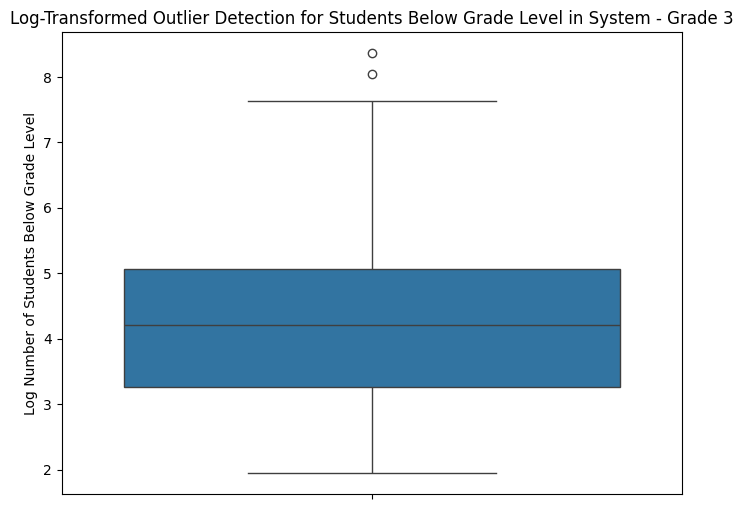

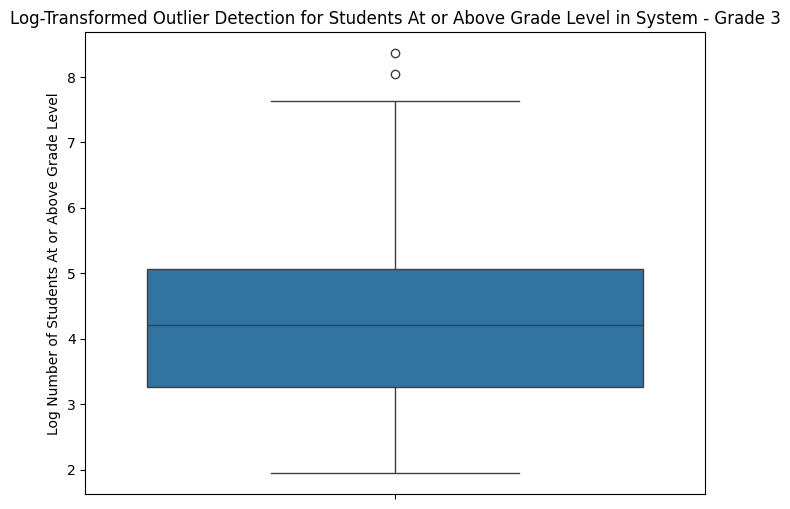

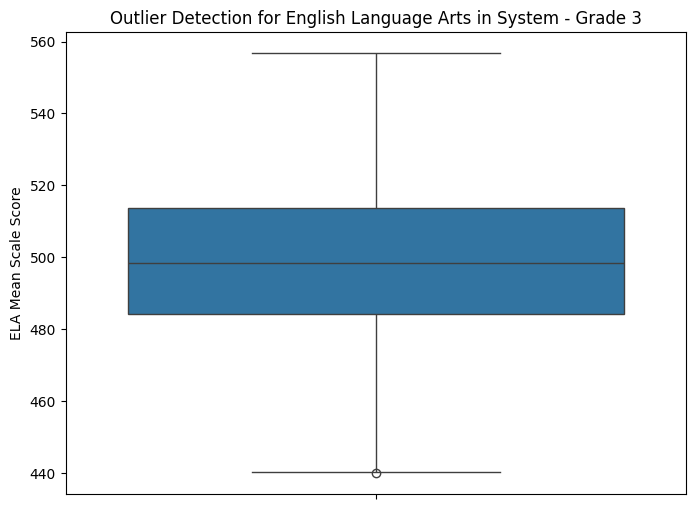

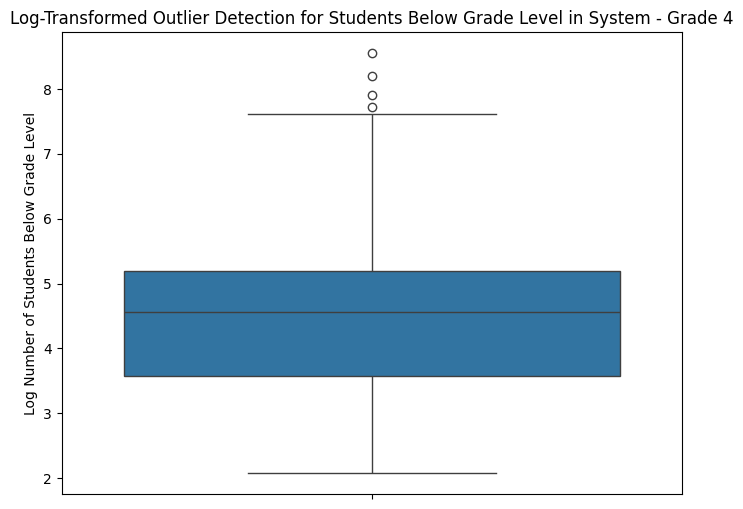

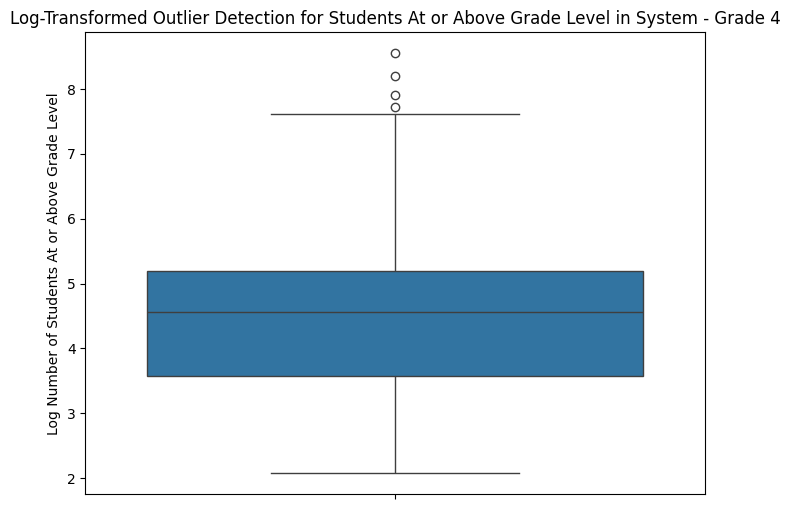

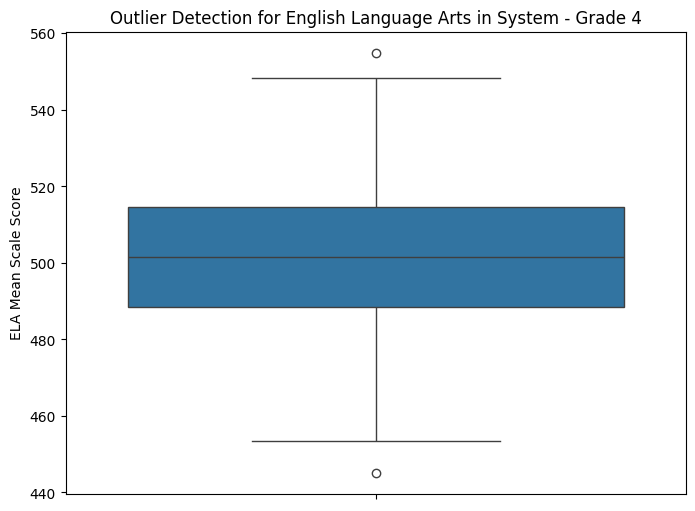

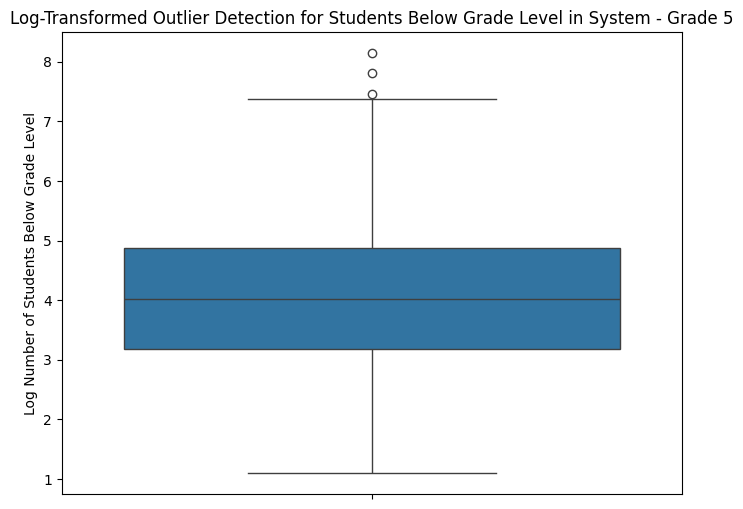

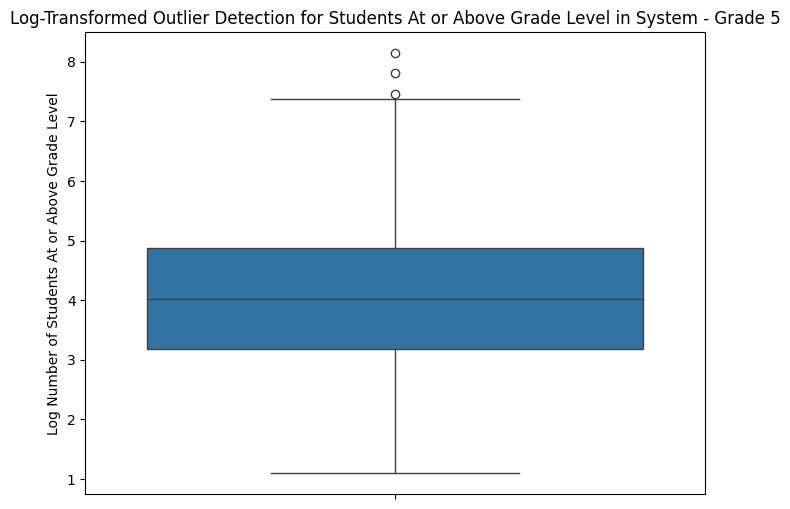

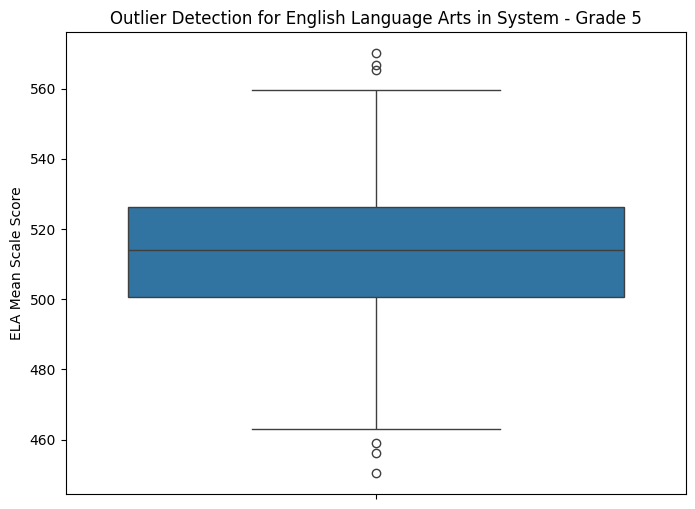

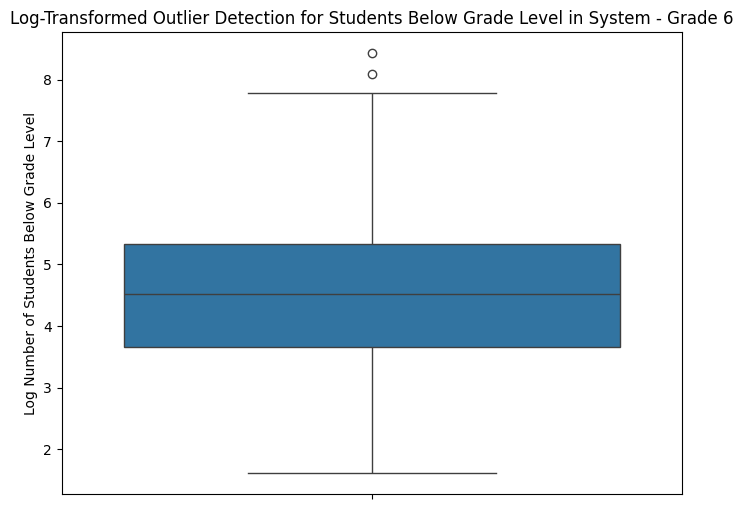

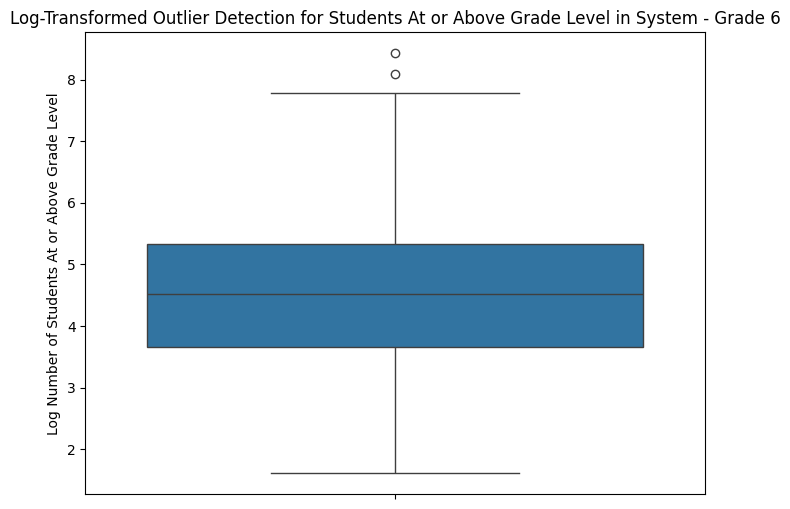

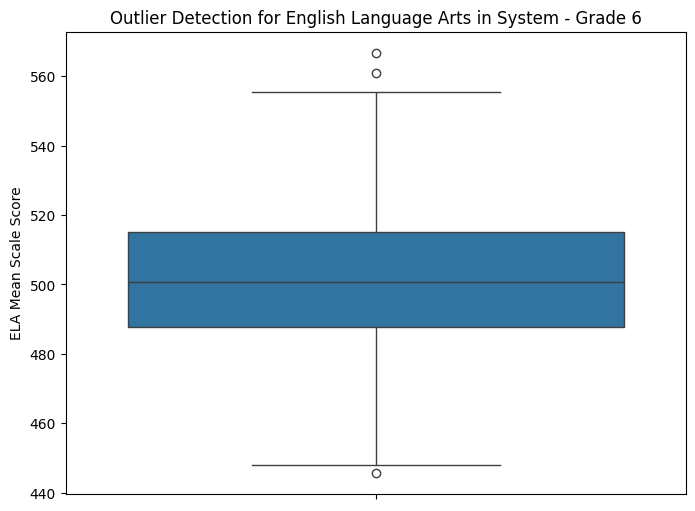

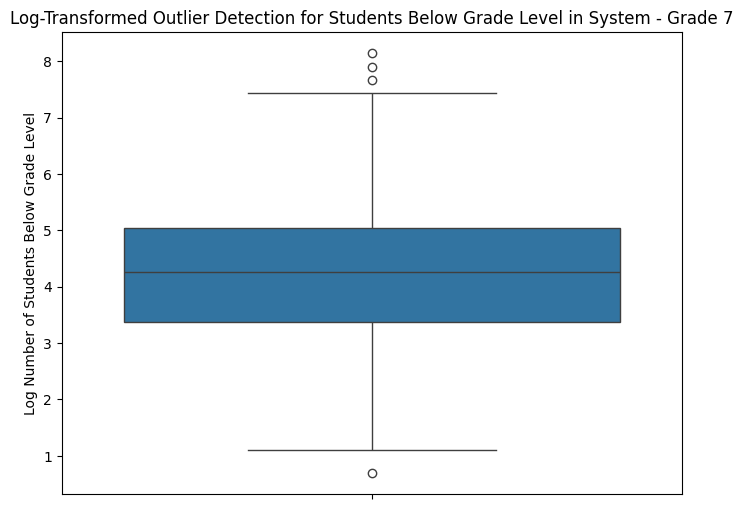

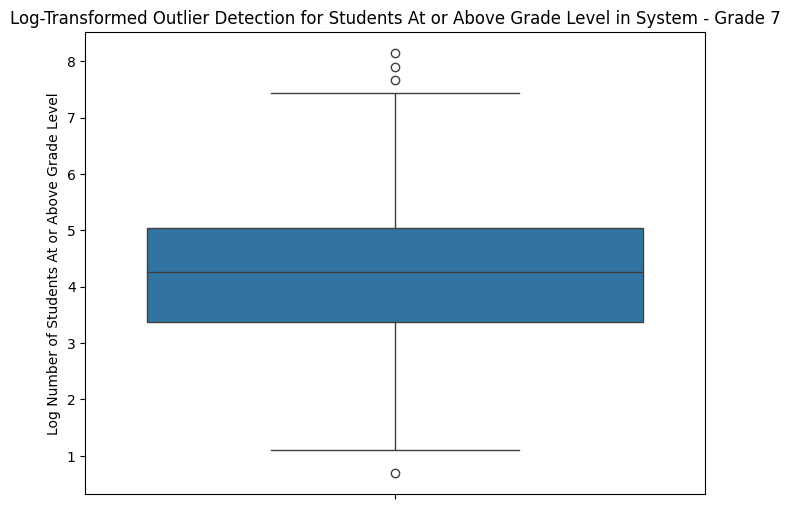

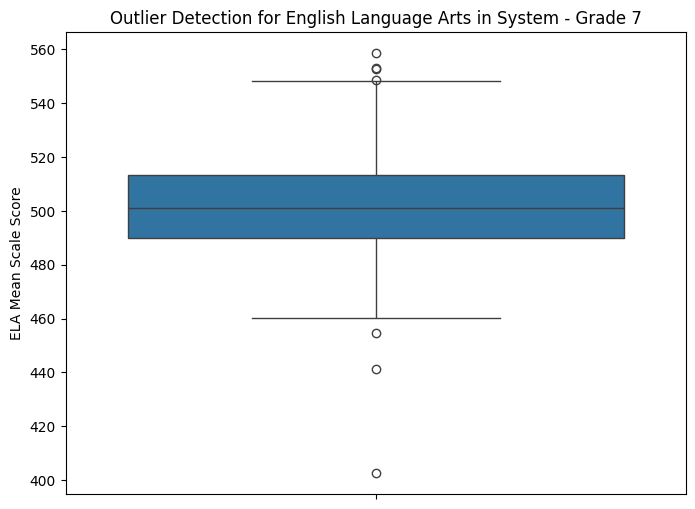

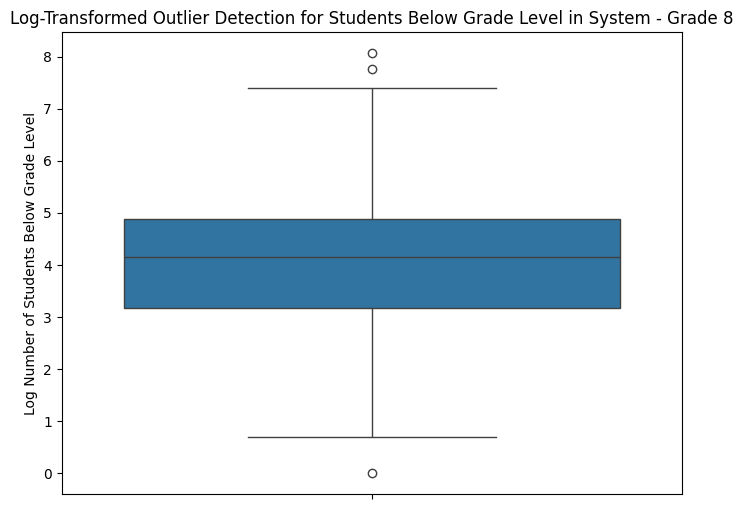

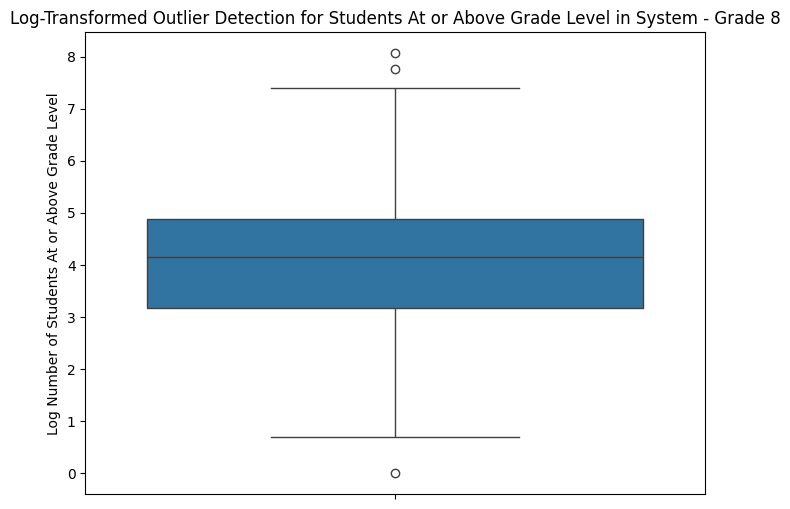

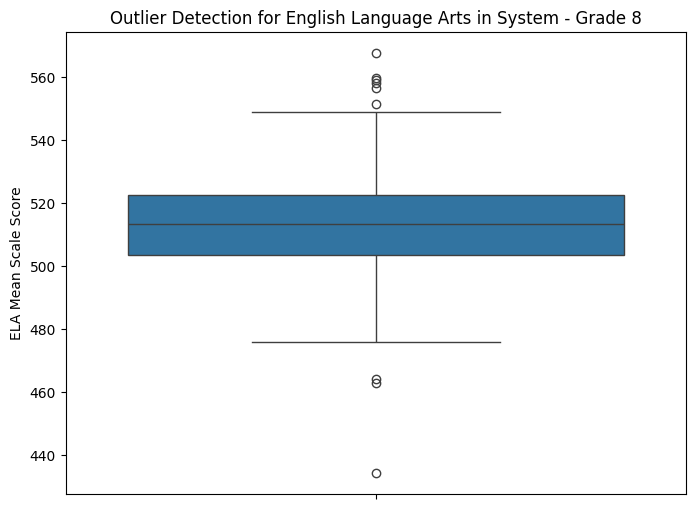

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of all grade sheet names (Grades 3-8)
sheet_names = ['System - Grade 3', 'System - Grade 4', 'System - Grade 5', 
               'System - Grade 6', 'System - Grade 7', 'System - Grade 8']

# Initialize a dictionary to store the loaded DataFrames
cleaned_sheets = {}

# Load all cleaned CSV files for grades 3-8
for sheet in sheet_names:
    file_path = f'{sheet}_cleaned.csv'
    cleaned_sheets[sheet] = pd.read_csv(file_path)

# Inspecting each sheet to calculate actual number of students below and at/above grade level
for sheet, df in cleaned_sheets.items():
    # Check if relevant columns for reading status exist
    if 'Reading Status^ Number Tested' in df.columns:
        # Look for "Below Grade Level" and "Grade Level" columns
        below_grade_cols = [col for col in df.columns if 'Below Grade Level' in col]
        above_grade_cols = [col for col in df.columns if 'Grade Level' in col]
        
        if not below_grade_cols or not above_grade_cols:
            print(f"Warning: Missing reading status columns in {sheet}")
            continue  # Skip to the next sheet if columns are missing
        
        below_grade_col = below_grade_cols[0]  # Take the first match for below-grade
        above_grade_col = above_grade_cols[0]  # Take the first match for at/above grade

        # Calculate the actual number of students below grade level
        df['Num Below Grade Level'] = df[below_grade_col] * df['Reading Status^ Number Tested'] / 100
        
        # Calculate the actual number of students at or above grade level
        df['Num At or Above Grade Level'] = df[above_grade_col] * df['Reading Status^ Number Tested'] / 100
        
        # Apply log transformation to handle large ranges and outliers (add 1 to avoid log(0))
        df['Log Num Below Grade Level'] = np.log1p(df['Num Below Grade Level'])
        df['Log Num At or Above Grade Level'] = np.log1p(df['Num At or Above Grade Level'])

        # Generate boxplot for log-transformed number of students below grade level
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, y='Log Num Below Grade Level')
        plt.title(f"Log-Transformed Outlier Detection for Students Below Grade Level in {sheet}")
        plt.ylabel('Log Number of Students Below Grade Level')
        plt.show()

        # Generate boxplot for log-transformed number of students at or above grade level
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, y='Log Num At or Above Grade Level')
        plt.title(f"Log-Transformed Outlier Detection for Students At or Above Grade Level in {sheet}")
        plt.ylabel('Log Number of Students At or Above Grade Level')
        plt.show()

    # English Language Arts boxplot (Optional)
    if 'English Language Arts Mean Scale Score' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, y='English Language Arts Mean Scale Score')
        plt.title(f"Outlier Detection for English Language Arts in {sheet}")
        plt.ylabel('ELA Mean Scale Score')
        plt.show()







### Summary of Findings

### 1. Below Grade Level (Reading):
- Across grades 3 to 8, the percentage of students below grade level exhibits a similar trend where the majority of students fall within a predictable range.
- Grades 4, 5, and 7 displayed more outliers, indicating larger numbers of students struggling significantly in these grades.
- Notable variation in the number of students below grade level can be seen, with Grades 4 and 5 having more students falling below expected performance.

### 2. At or Above Grade Level (Reading):
- For students performing at or above grade level, the trends remain relatively stable, but outliers still exist in each grade.
- Grades 4 and 5 saw a wider distribution in students performing at or above grade level, with some outliers achieving far better results than their peers.

### 3. ELA Mean Scale Scores:
- ELA scores for all grades follow a similar distribution, with minimal outliers observed in grades 3, 4, and 6. However, Grades 7 and 8 have more extreme values in both directions.
- Scores tend to be concentrated around the median, with Grades 5 and 8 showing more spread.

### Implications:
- **Outliers:** The presence of outliers across both below grade level and above grade level suggests that there is a significant gap in student performance, which needs to be addressed through tailored interventions.
  
- **Targeted Support:** The results highlight specific grades (particularly 4, 5, and 8) where targeted support may be required for students both above and below grade level to close the achievement gap.

### Recommendation Engine Input:
This data will help build a recommendation engine that identifies students who are significantly behind or ahead of their peers. By factoring in the number of students tested and performance outliers, the system can suggest tailored educational resources (e.g., additional reading materials, Lexile level adjustments) to better support student needs at both ends of the performance spectrum.

This insight will inform the next phase of modeling, where interventions can be designed to bring the students below grade level closer to grade expectations and enhance the performance of those already at or above grade level.


## Exploratory Data Analysis (EDA): Correlation Heatmap

### Purpose:
In this section, we explore the relationships between key variables such as Lexile reading levels and English Language Arts (ELA) scores. By visualizing the correlations, we can understand the strength and direction of these relationships, which will inform our feature selection process for modeling.

### Correlation Insights:
A correlation heatmap allows us to visualize how different variables relate to one another on a scale of -1 to 1. A correlation value of **1** indicates a perfect positive relationship, while a correlation of **-1** indicates a perfect negative relationship. A value close to **0** means no correlation between the variables.

- **Positive Correlation (close to 1)**: As one variable increases, the other variable also increases.
- **Negative Correlation (close to -1)**: As one variable increases, the other variable decreases.
- **No Correlation (close to 0)**: No clear relationship between the variables.

In the context of our analysis, we will focus on the correlation between:

- English Language Arts (ELA) Mean Scale Scores
- Percentage of students below grade level (based on Lexile scores)
- Percentage of students at or above grade level (based on Lexile scores)

By analyzing these correlations, we can better understand how reading proficiency levels correlate with overall ELA performance, which will help in selecting features for our recommendation engine.

---

### Correlation Heatmap Visualization:
The heatmaps generated below show the correlation between these variables across different grade levels (Grades 3-8). The correlation values will be used to inform feature selection for the modeling phase.


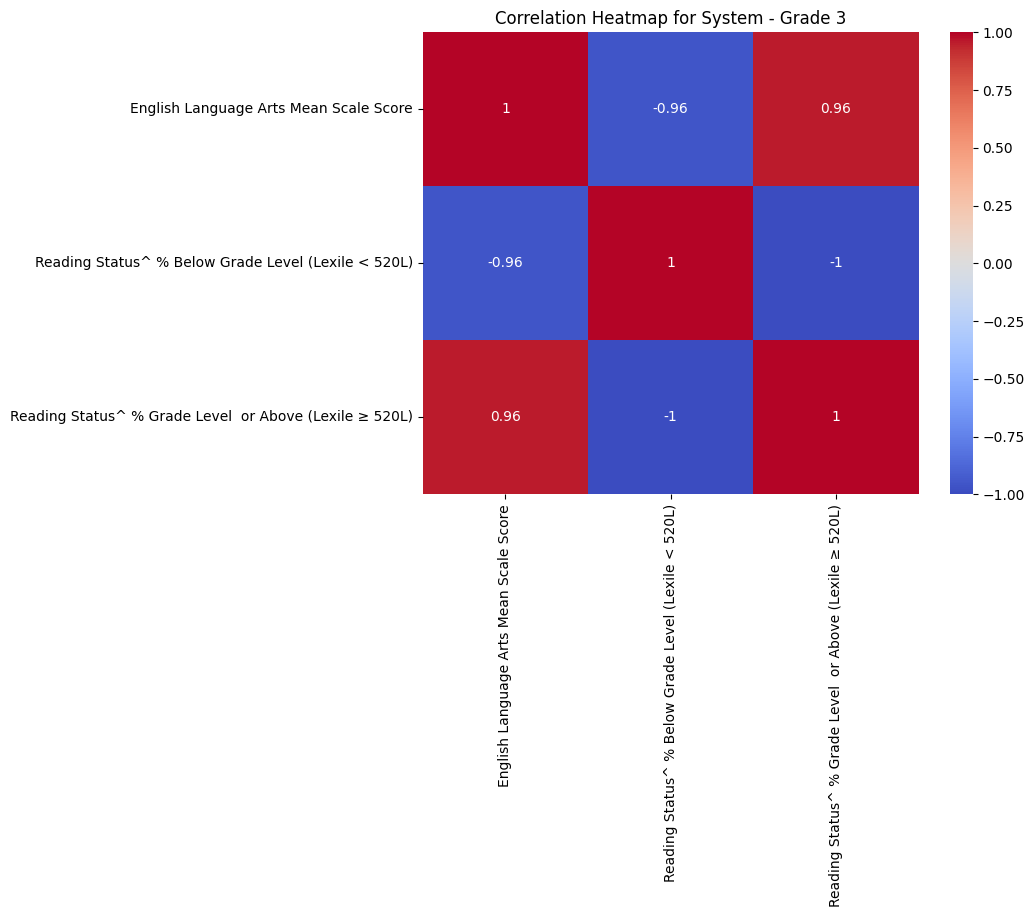

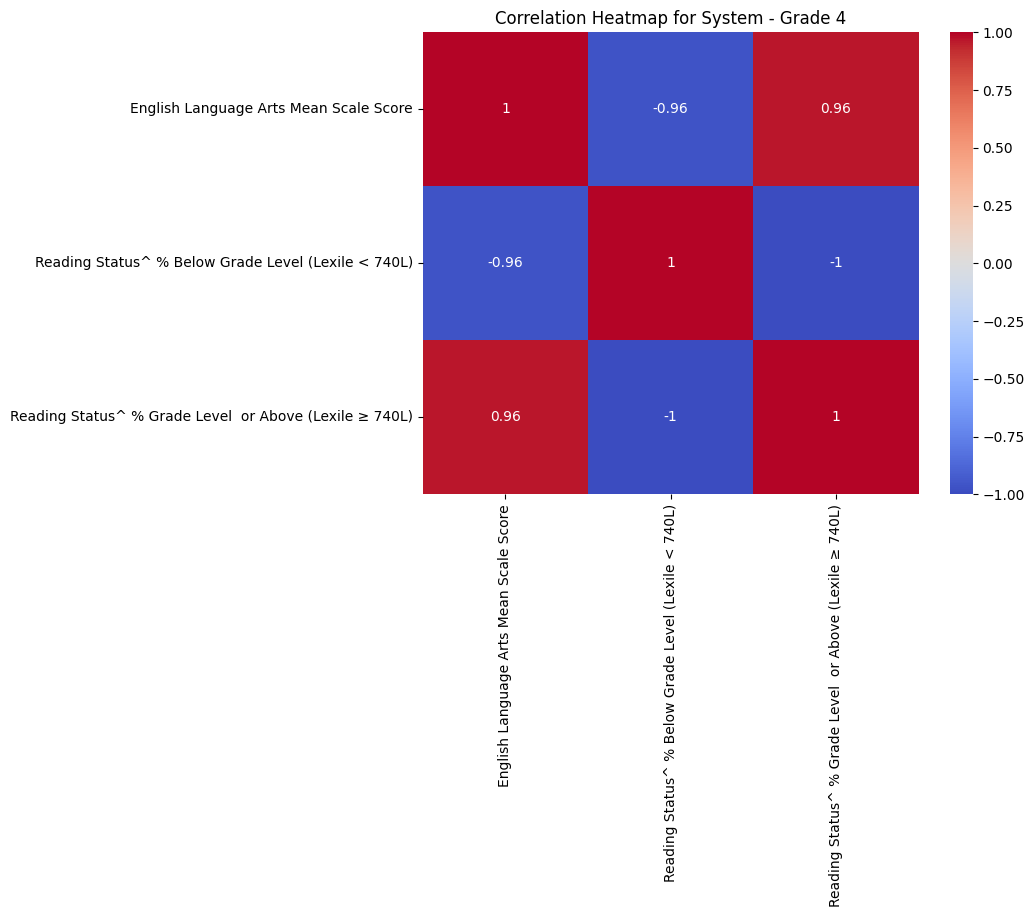

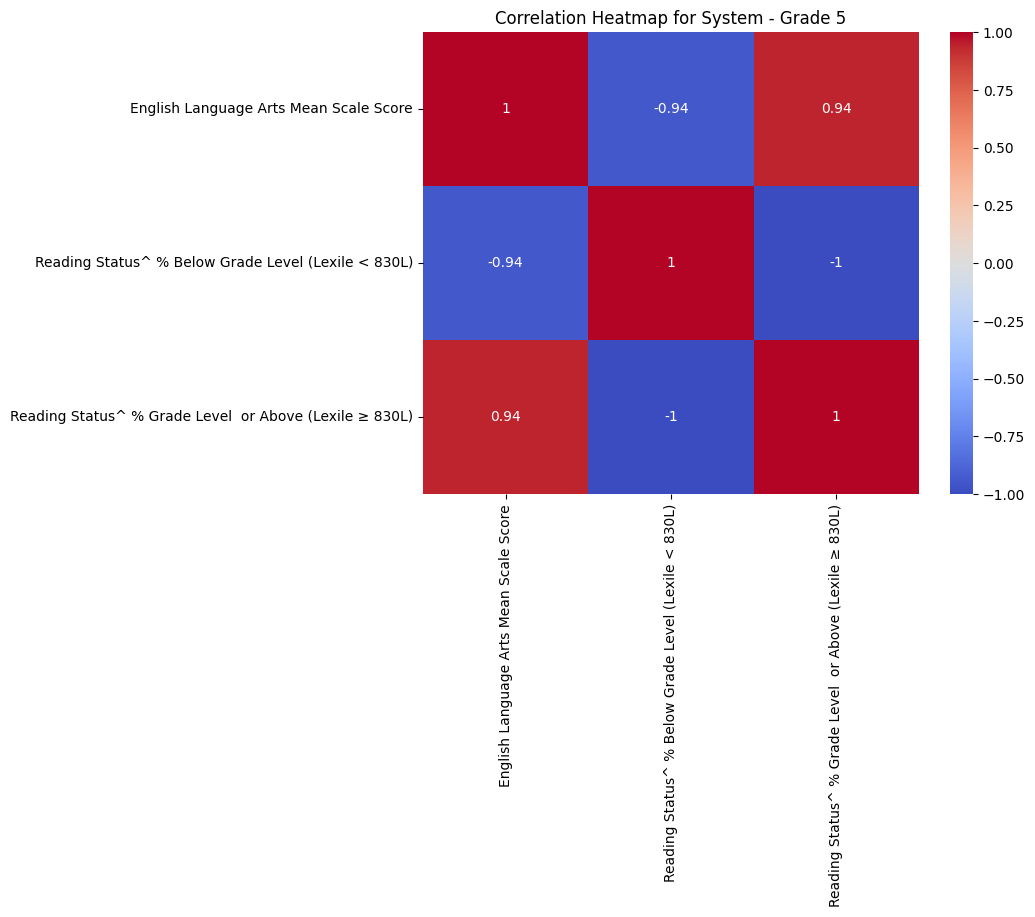

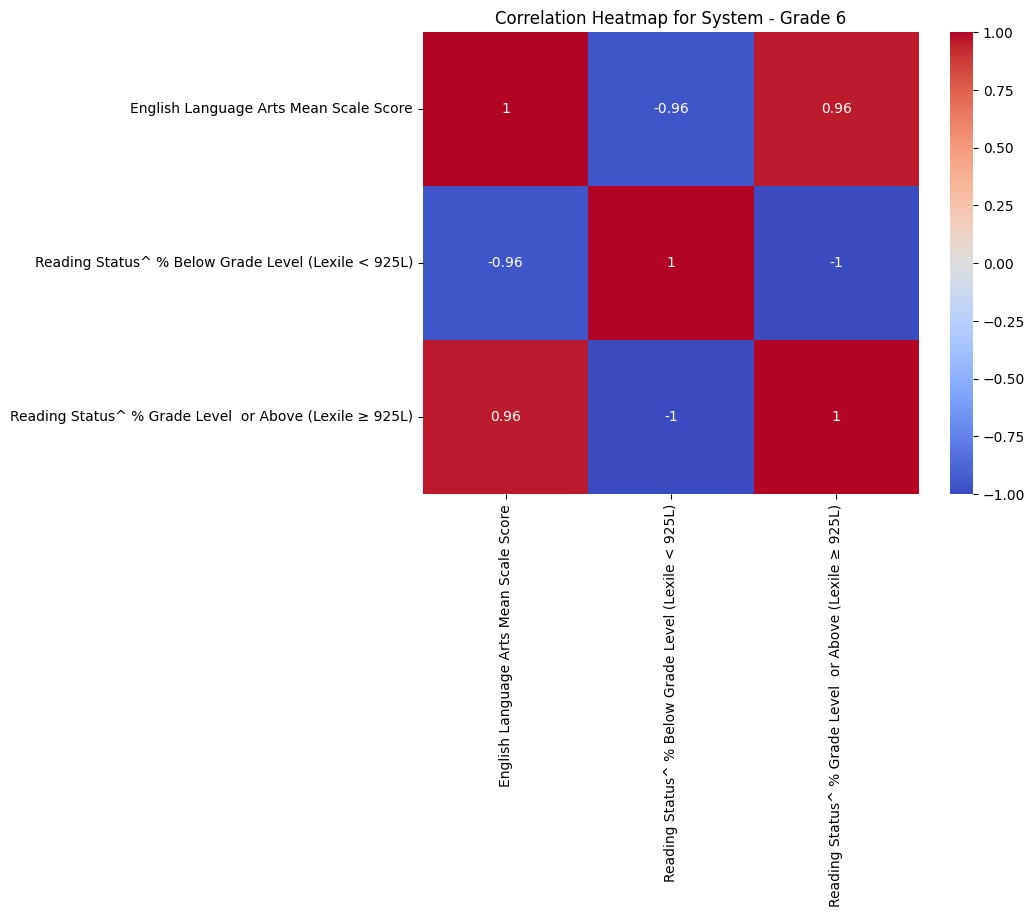

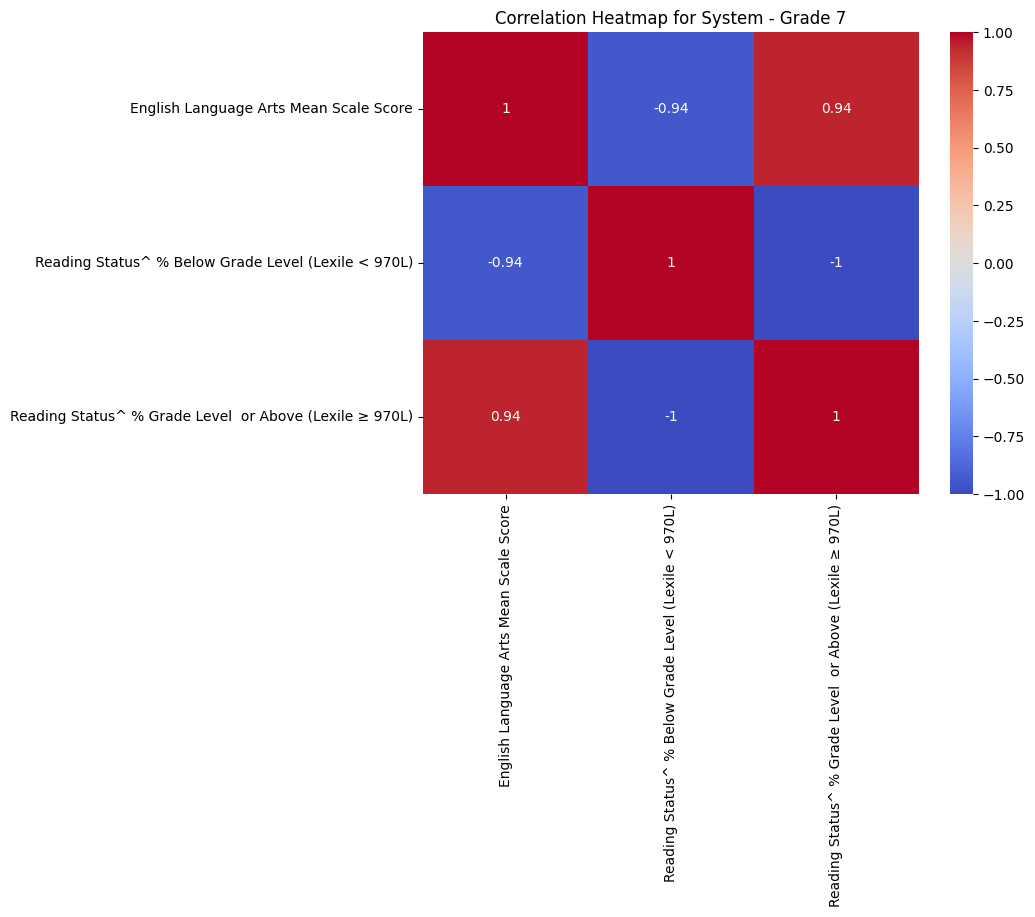

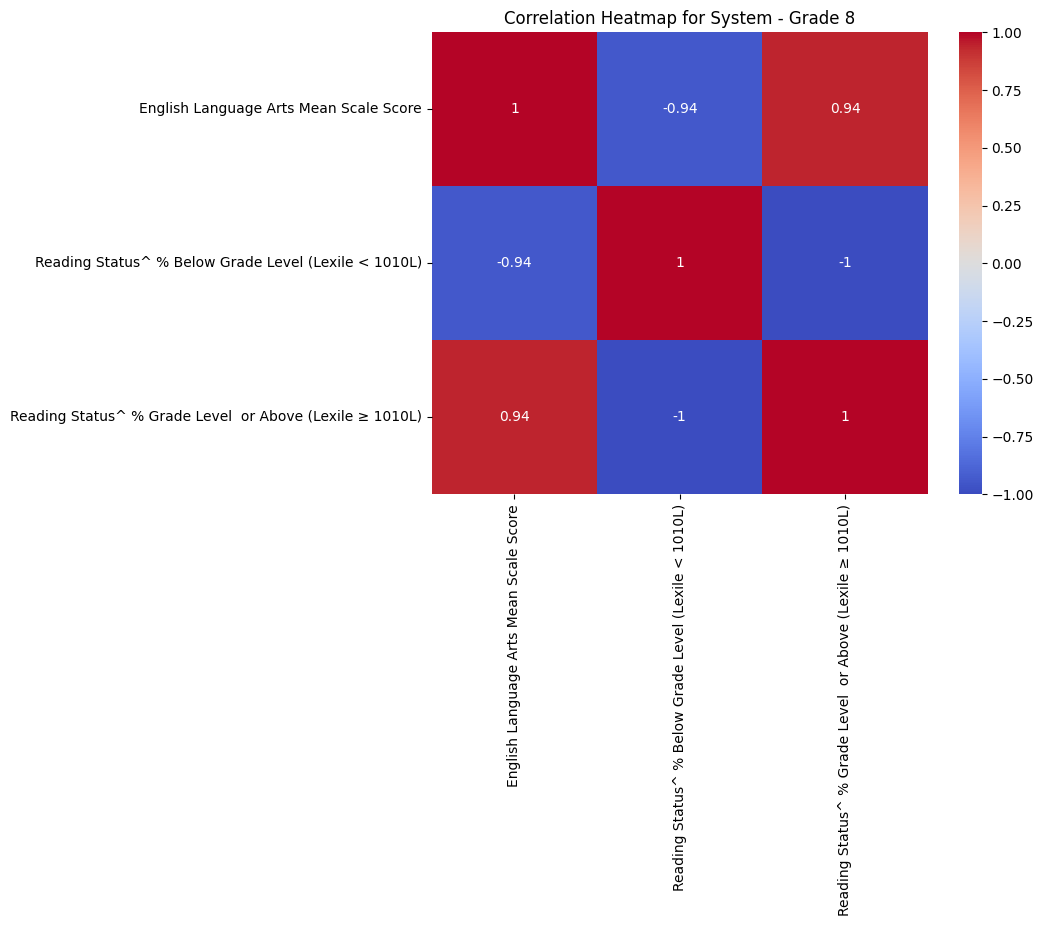

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of all grade sheet names (Grades 3-8) and their Lexile column names
grade_lexile_levels = {
    'System - Grade 3': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 520L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 520L)'
    },
    'System - Grade 4': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 740L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 740L)'
    },
    'System - Grade 5': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 830L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 830L)'
    },
    'System - Grade 6': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 925L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 925L)'
    },
    'System - Grade 7': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 970L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 970L)'
    },
    'System - Grade 8': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 1010L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 1010L)'
    }
}

# Initialize a dictionary to store the loaded DataFrames
cleaned_sheets = {}

# Load all cleaned CSV files for grades 3-8
for sheet in grade_lexile_levels.keys():
    file_path = f'{sheet}_cleaned.csv'
    cleaned_sheets[sheet] = pd.read_csv(file_path)

# Check available columns and perform correlation analysis
for sheet, df in cleaned_sheets.items():
    lexile_info = grade_lexile_levels[sheet]
    ela_col = 'English Language Arts Mean Scale Score'

    # Check if both Lexile columns and ELA scores exist
    if lexile_info['below_grade_col'] in df.columns and lexile_info['above_grade_col'] in df.columns and ela_col in df.columns:
        # Select relevant columns for correlation
        relevant_cols = [ela_col, lexile_info['below_grade_col'], lexile_info['above_grade_col']]

        # Perform correlation analysis
        correlation_matrix = df[relevant_cols].corr(method='pearson')

        # Plot heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlation Heatmap for {sheet}')
        plt.show()
    else:
        missing_cols = [col for col in [lexile_info['below_grade_col'], lexile_info['above_grade_col'], ela_col] if col not in df.columns]
        print(f"Skipping {sheet} due to missing columns: {missing_cols}")


For those who prefer to see the exact correlation values, here are the numerical correlations between ELA scores and Lexile reading levels for each grade.

In [69]:
import pandas as pd

# List of all grade sheet names (Grades 3-8) and their Lexile column names
grade_lexile_levels = {
    'System - Grade 3': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 520L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 520L)'
    },
    'System - Grade 4': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 740L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 740L)'
    },
    'System - Grade 5': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 830L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 830L)'
    },
    'System - Grade 6': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 925L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 925L)'
    },
    'System - Grade 7': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 970L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 970L)'
    },
    'System - Grade 8': {
        'below_grade_col': 'Reading Status^ % Below Grade Level (Lexile < 1010L)',
        'above_grade_col': 'Reading Status^ % Grade Level  or Above (Lexile ≥ 1010L)'
    }
}

# Initialize a dictionary to store the loaded DataFrames
cleaned_sheets = {}

# Load all cleaned CSV files for grades 3-8
for sheet in grade_lexile_levels.keys():
    file_path = f'{sheet}_cleaned.csv'
    cleaned_sheets[sheet] = pd.read_csv(file_path)

# Check available columns and perform correlation analysis
for sheet, df in cleaned_sheets.items():
    lexile_info = grade_lexile_levels[sheet]
    ela_col = 'English Language Arts Mean Scale Score'

    # Check if both Lexile columns and ELA scores exist
    if lexile_info['below_grade_col'] in df.columns and lexile_info['above_grade_col'] in df.columns and ela_col in df.columns:
        # Select relevant columns for correlation
        relevant_cols = [ela_col, lexile_info['below_grade_col'], lexile_info['above_grade_col']]

        # Perform correlation analysis
        correlation_matrix = df[relevant_cols].corr(method='pearson')

        # Print the correlation values for each sheet
        print(f'Correlation values for {sheet}:')
        print(correlation_matrix)
        print("\n" + "="*80 + "\n")  # Separator for readability
    else:
        missing_cols = [col for col in [lexile_info['below_grade_col'], lexile_info['above_grade_col'], ela_col] if col not in df.columns]
        print(f"Skipping {sheet} due to missing columns: {missing_cols}")


Correlation values for System - Grade 3:
                                                    English Language Arts Mean Scale Score  \
English Language Arts Mean Scale Score                                            1.000000   
Reading Status^ % Below Grade Level (Lexile < 5...                               -0.960047   
Reading Status^ % Grade Level  or Above (Lexile...                                0.960047   

                                                    Reading Status^ % Below Grade Level (Lexile < 520L)  \
English Language Arts Mean Scale Score                                                      -0.960047     
Reading Status^ % Below Grade Level (Lexile < 5...                                           1.000000     
Reading Status^ % Grade Level  or Above (Lexile...                                          -1.000000     

                                                    Reading Status^ % Grade Level  or Above (Lexile ≥ 520L)  
English Language Arts Mean Scale Score     

## Exploratory Data Analysis (EDA): Correlation Analysis of ELA Scores and Lexile Reading Levels

The correlation analysis performed across grades 3 to 8 revealed significant relationships between Lexile reading levels and English Language Arts (ELA) scores. While it is well understood that ELA performance correlates with reading levels, this analysis serves as a crucial step in designing a recommendation engine that leverages these relationships to drive personalized learning interventions and gamification strategies.

### Key Findings:

### ELA Scores and Lexile Reading Levels:
There is a strong positive correlation between ELA scores and the percentage of students reading at or above grade level across all grades. This relationship indicates that higher-performing students in ELA assessments tend to have Lexile scores that reflect grade-level reading abilities.

Conversely, the percentage of students reading below grade level has a strong negative correlation with ELA scores, demonstrating the expected inverse relationship.

### Inverse Relationship Between Below and At/Above Grade-Level Reading:
The analysis found a strong negative correlation (~-0.90) between the percentage of students reading below grade level and those reading at or above grade level. This inverse relationship highlights the complementary nature of these metrics. Such insights can be effectively leveraged in the recommendation engine to identify opportunities for targeted interventions.

## Application to the Recommendation Engine:

### Personalization of Learning Resources:
The recommendation engine will utilize Lexile scores as a predictive feature to recommend reading materials, exercises, and learning pathways tailored to each student’s needs. By tracking a student’s improvement in Lexile measures, the system can continuously adjust recommended resources to ensure that learning materials are appropriately challenging yet achievable.

### Focus on Measurable Gains:
Given the strong correlations between Lexile levels and ELA performance, the engine can prioritize interventions aimed at increasing Lexile scores. This provides a clear and measurable goal for educators and parents, aligning efforts with actions that directly influence overall academic performance.

### Data-Driven Parent Engagement:
The gamification component will use Lexile score improvements as a key metric to engage parents. By showing them how specific actions—such as reading more challenging materials—can result in measurable gains in Lexile scores (and consequently ELA scores), the system incentivizes continuous involvement. This approach supports the broader goal of increasing parental engagement in a way that directly benefits student outcomes.



## Exploratory Data Analysis (EDA): Segmentation of Students

## Introduction
In this section, we explore the segmentation of students based on their performance in English Language Arts (ELA) assessments, as provided in the dataset. The dataset already categorizes students into four key performance levels:

- **Beginning Learner:** Students who are struggling and are below grade-level proficiency.
- **Developing Learner:** Students approaching proficiency but still require support to reach grade-level standards.
- **Proficient Learner:** Students who meet grade-level expectations with a solid understanding of the curriculum.
- **Distinguished Learner:** Students who exceed grade-level expectations, requiring advanced learning opportunities.

### Importance of Segmentation for the Recommendation Engine
Segmentation plays a crucial role in tailoring educational resources and interventions for each group. 
- **Beginning Learners** may need foundational skill-building activities.
- **Developing Learners** could benefit from reinforcement exercises and focused interventions.
- **Proficient Learners** should have access to materials that further solidify their understanding.
- **Distinguished Learners** may require enrichment programs or advanced learning resources.

By understanding each segment, the recommendation engine can assign appropriate resources based on performance levels, allowing for a personalized learning experience that directly addresses each student’s needs.

## Visualization of Student Segments
Below is a visualization showing the distribution of students across the performance levels for each grade.



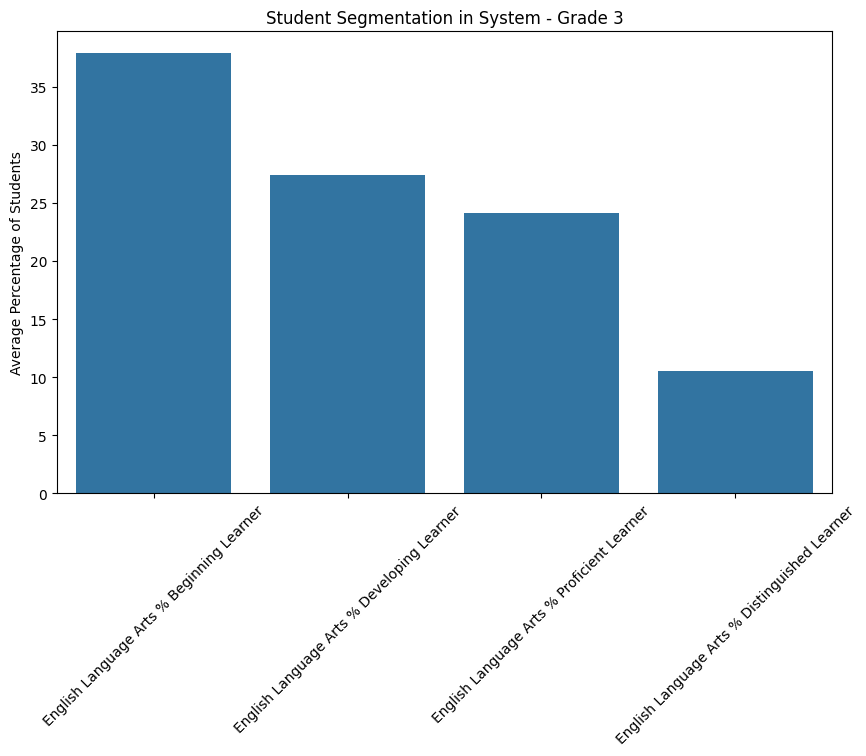

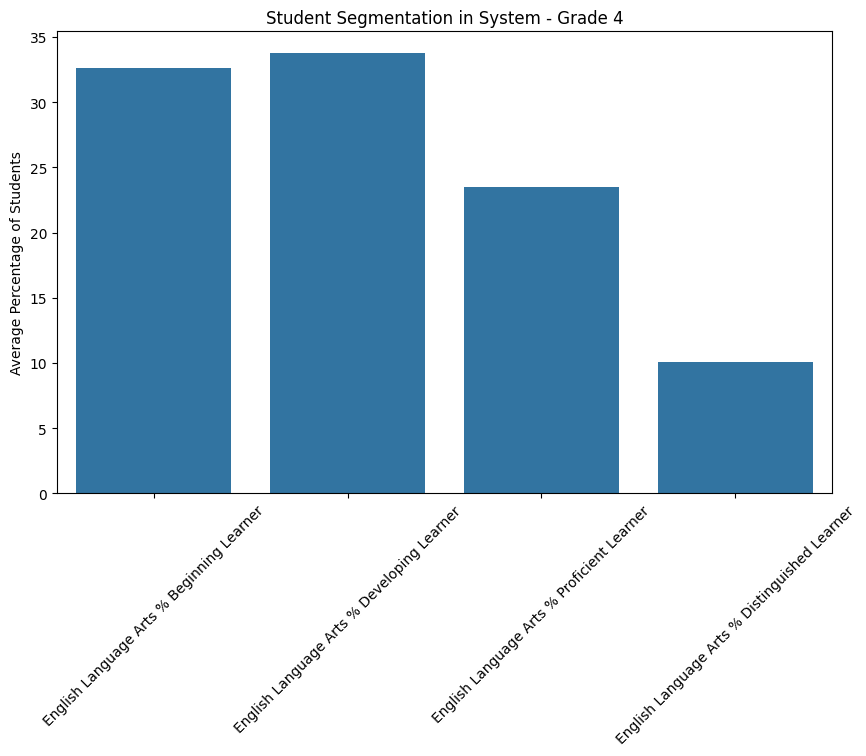

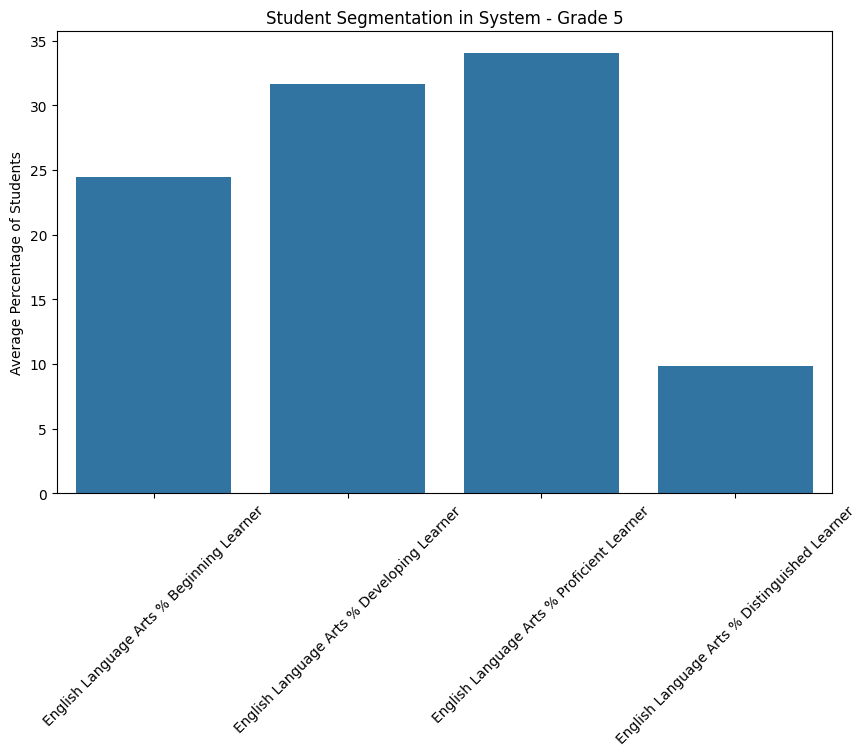

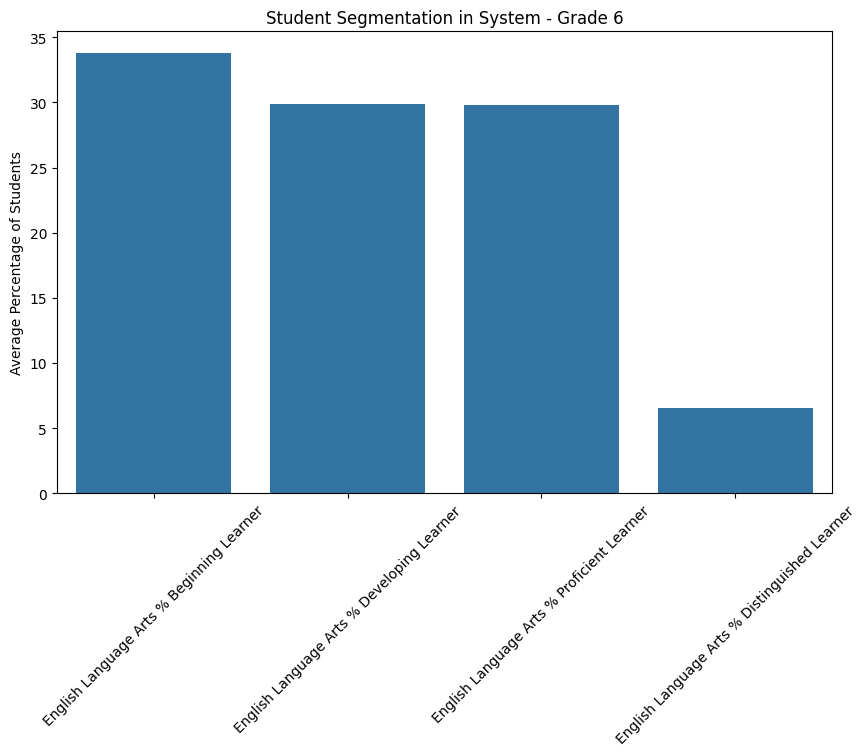

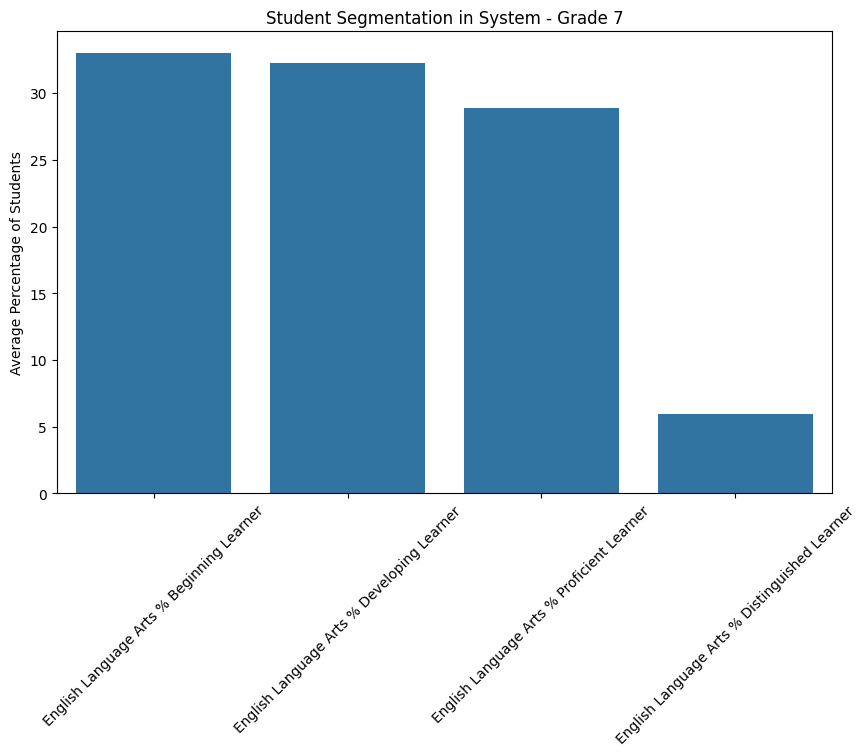

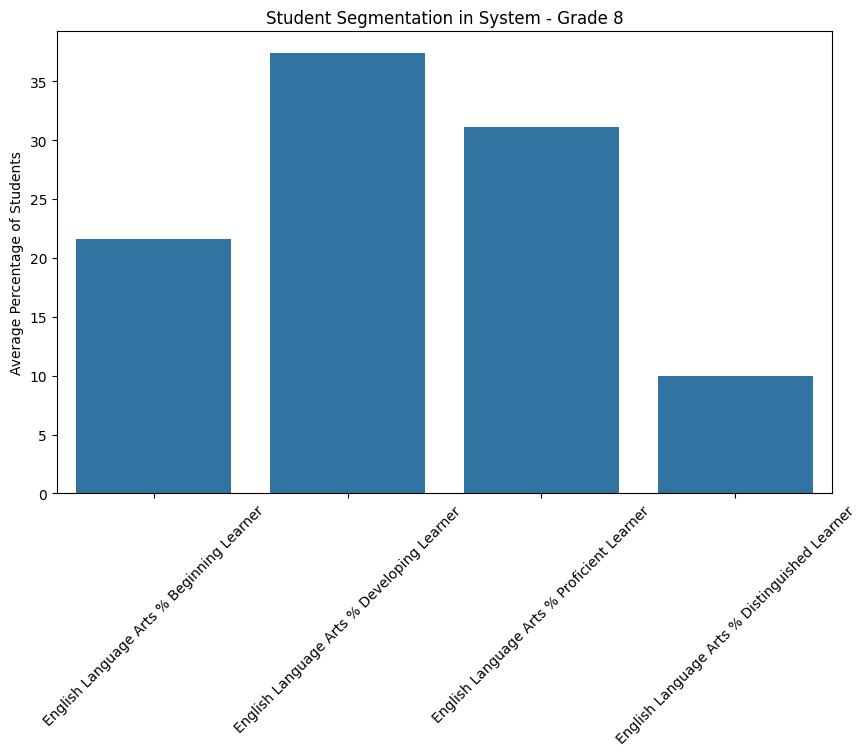

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a visualization for student segmentation across grades
def plot_segment_distribution(grade, data):
    segments = [
        'English Language Arts % Beginning Learner',
        'English Language Arts % Developing Learner',
        'English Language Arts % Proficient Learner',
        'English Language Arts % Distinguished Learner'
    ]
    
    segment_values = data[segments].mean()  # Calculate the average percentage of students in each category

    plt.figure(figsize=(10, 6))
    sns.barplot(x=segments, y=segment_values)
    plt.title(f'Student Segmentation in {grade}')
    plt.ylabel('Average Percentage of Students')
    plt.xticks(rotation=45)
    plt.show()

# Example visualization for each grade (you can loop through your dataset)
for sheet, df in cleaned_sheets.items():
    plot_segment_distribution(sheet, df)



The recommendation engine will use these segments to provide personalized learning resources. 

- **Beginning Learners** will be assigned foundational reading exercises and targeted interventions aimed at improving basic literacy skills.
- **Developing Learners** will be provided reinforcement exercises that help bridge the gap between partial proficiency and full mastery of the curriculum.
- **Proficient Learners** will receive materials that challenge them to deepen their understanding and continue their academic growth.
- **Distinguished Learners** will be encouraged to engage in enrichment programs and more advanced reading tasks to further develop their skills.

This tailored approach ensures that students receive the right support at the right time, helping them progress towards academic excellence.


## Parental Involvement and Student Academic Success

### Introduction
Parental involvement in a child’s education has consistently been associated with improved academic outcomes. In this section, we analyze how various forms of parental engagement—such as monitoring homework, discussing everyday events, and providing support for school activities—impact student performance, as supported by the findings from the *Education Journal* study.

### Quantitative Findings

#### Homework Monitoring
The study found that **31%** of the variance in student grades was positively correlated with the frequency of parents checking their child’s homework (**r = 0.31, p < 0.01**). This suggests that students whose parents regularly check their homework tend to achieve higher grades.

#### Everyday Communication
A positive correlation (**r = 0.10, p < 0.05**) was identified between the frequency of parents discussing everyday events with their children and the likelihood of receiving academic awards. This suggests that consistent parent-child communication contributes to recognition of academic achievement.

#### Unexpected Findings on Academic Awards
Interestingly, the frequency of parents checking their child’s homework was negatively correlated with students receiving academic awards (**r = -0.19, p < 0.01**). This suggests that while regular homework monitoring improves grades, it may not necessarily lead to higher recognition or awards.

#### No Significant Impact of Parents' Education Level
Contrary to previous studies, this research found no significant difference in academic performance between children of highly educated parents and those of parents with secondary education when both groups had equal parental involvement. In fact, children whose parents had only secondary education performed better in some cases when involved in discussing everyday events (**U = 2030.50, p < 0.01**).

### Qualitative Insights

#### Supervision vs. Communication-Based Involvement
The study highlights that different types of parental involvement yield different academic outcomes. For instance, **supervision-based involvement**, such as homework checking, directly correlates with better grades, whereas **communication-based involvement**, like talking about everyday activities, fosters academic recognition.

#### No Influence of Parents’ Education Level
The study also found that parental educational attainment does not significantly influence academic performance when parents are equally involved in their child's education. This challenges the traditional view that highly educated parents necessarily provide an academic advantage.

### Conclusion
The findings affirm that parental involvement, regardless of parents' educational background, plays a critical role in improving academic outcomes. Incorporating these insights into our recommendation engine, we can design a system that incentivizes parents to engage in key behaviors—such as homework monitoring and communication—to support their child's academic success. This can be gamified by rewarding parents with badges or certificates for consistent involvement, directly tying parental actions to student performance.

### References
- *Education Journal*, (2021). *Impacts of Parental Involvement and Parents’ Level of Education on Student’s Academic Accomplishment.*




## Visualization: Parental Involvement and Academic Success

To visualize the relationship between parental involvement and academic outcomes, we can create a correlation heatmap that demonstrates how various types of parental engagement influence grades and academic awards.

### Correlation Heatmap: Parental Involvement vs. Academic Success


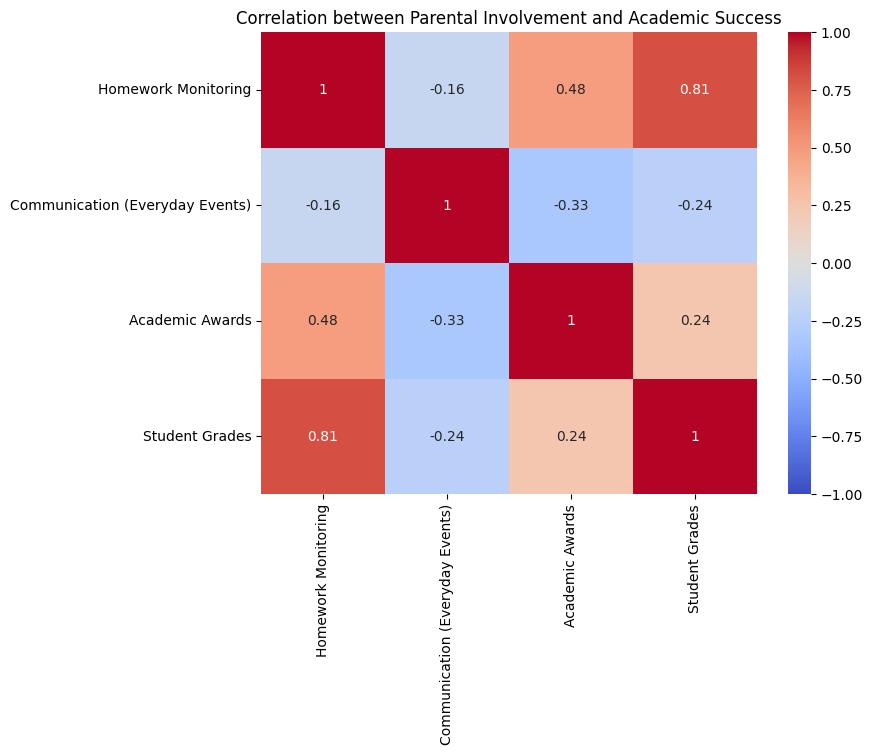

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example data based on the study's findings
data = {
    'Homework Monitoring': [3, 4, 5, 2, 4],
    'Communication (Everyday Events)': [4, 5, 3, 4, 5],
    'Academic Awards': [1, 0, 1, 0, 1],
    'Student Grades': [85, 90, 95, 88, 92]
}

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Parental Involvement and Academic Success')
plt.show()


APA Citation for the Study:
Lim, W. (2021). Impacts of Parental Involvement and Parents' Level of Education on Student's Academic Accomplishment. Education Journal, 10(1), 35-39.

## Transition to Modeling Phase

With the completion of the **Exploratory Data Analysis (EDA)** phase, we have successfully uncovered key insights into the relationships between factors such as **parental involvement** and **student academic performance**, and performed **correlation analysis** between Lexile reading levels and ELA scores. 

The **segmentation of students** based on reading proficiency further enabled us to categorize students into appropriate performance levels, allowing for a better understanding of their academic needs. These insights lay the foundation for the next stage of our process.

### Next Steps: Moving into the Modeling Phase

We now transition to the **Modeling** phase, where we will develop a recommendation engine to suggest books that are appropriate for students based on their Lexile reading levels and grade levels. This engine aims to support the learning process by providing reading materials that are both challenging and accessible to each student.

**Important Note:**

- The book recommendations presented in this engine are based on sample data retrieved from the **Lexile Find a Book** tool on the MetaMetrics platform.
- The current implementation uses a limited sample size of book data to demonstrate the functionality of the recommendation engine. However, access to a more comprehensive dataset, including a wider range of books and Lexile levels, is available through **MetaMetrics**, which offers this data under a licensable agreement.
  
Our focus for this model is to:

- Utilize **Lexile reading levels** and **grade levels** to provide personalized book recommendations for each student.
- Integrate the results of the segmentation and EDA phases to offer reading suggestions that will help students progress in their reading development.
- Explore how we can leverage this engine to enhance parental engagement and contribute to a more holistic educational approach.

This marks the beginning of our **Modeling Phase**, where the goal is to apply our understanding to create a functional recommendation system that can be scaled with more extensive data in future iterations.


In [19]:
import sqlite3
import pandas as pd

# Connect to SQLite database
db_path = r'C:\APS Book Database\Apsbdb'  # Use 'r' to handle backslashes in the path
conn = sqlite3.connect(db_path)

# Define the recommendation engine function
def get_book_recommendations(grade_level, student_lexile, lexile_tolerance=50):
    """
    Fetch book recommendations based on student's grade level and lexile range.
    
    Parameters:
    grade_level (int): The student's grade level
    student_lexile (int): The student's Lexile score
    lexile_tolerance (int): Tolerance for Lexile range (+/-) from student's Lexile score
    
    Returns:
    DataFrame: A DataFrame containing the recommended books
    """
    
    # Define the query to fetch books within the Lexile range and grade level
    query = f"""
    SELECT * FROM BookRecommendations
    WHERE GradeLevel = {grade_level}
    AND LexileLevel BETWEEN {student_lexile - lexile_tolerance} AND {student_lexile + lexile_tolerance}
    """
    
    # Execute the query
    recommendations = pd.read_sql(query, conn)
    
    return recommendations

# Example: Get recommendations for a 5th grade student with a Lexile score of 700
grade_level = 5
student_lexile = 700
recommendations = get_book_recommendations(grade_level, student_lexile)

# Display the recommendations
recommendations



,BookID,GradeLevel,LexileLevel,BookTitle,Author
0,51,5,660,The Harriet Tubman Report,Dufresne Michele
1,54,5,720,Star Wars: First Order Villains,Siglain Michael
2,55,5,700,Animal Migrations,Harriet Brundle
3,56,5,740,Trains Then and Now,MacCarald Clara
4,57,5,660,Influential Women in Medicine,Golkar Golriz
5,61,5,660,Drones in Action,Mari Bolte
6,66,5,720,The Solar System,Louise Nelson
7,71,5,740,Saturn,Owens L. L.


In [21]:
import sqlite3
import pandas as pd

# Write the SQL Query to Get Book Recommendations
# Function to get book recommendations based on grade level and Lexile score
def get_book_recommendations(grade_level, student_lexile, lexile_tolerance=50):
    conn = sqlite3.connect("C:/APS Book Database/Apsbdb")  # Connect to your database
    query = f"""
    SELECT BookTitle, LexileLevel, Author
    FROM BookRecommendations
    WHERE GradeLevel = {grade_level}
    AND LexileLevel BETWEEN {student_lexile - lexile_tolerance} AND {student_lexile + lexile_tolerance}
    """
    # Execute the query and get the results as a DataFrame
    recommendations = pd.read_sql_query(query, conn)
    conn.close()
    return recommendations


In [23]:
# Sample test: Get book recommendations for a 3rd-grade student with a Lexile level of 500
grade_level = 3
student_lexile = 500
recommendations = get_book_recommendations(grade_level, student_lexile)
print(recommendations)


                BookTitle  LexileLevel                Author
0          A Brave Escape          480           Baker Clair
1  Birdwatching with Pops          490        Cecilia Minden
2            A Great Idea          500           R Kornbluth
3                 Roiella          540      Dufresne Michele
4      Hulk: This is Hulk          510           Cohen Elana
5                Hamsters          500       Stevens Kathryn
6      Shopping for Props          460   Reis-Frankfort Tami
7    Mouse and the Hermit          490      Dufresne Michele
8      Family and Friends          500  Primm E. Russell III


In [25]:
# Display recommendations in a readable format
def display_recommendations(recommendations):
    if recommendations.empty:
        print("No recommendations found for this Lexile range.")
    else:
        print("Recommended Books:")
        for index, row in recommendations.iterrows():
            print(f"{index+1}. {row['BookTitle']} by {row['Author']} (Lexile Level: {row['LexileLevel']})")

# Display the recommendations
display_recommendations(recommendations)


Recommended Books:
1. A Brave Escape by Baker Clair (Lexile Level: 480)
2. Birdwatching with Pops by Cecilia Minden (Lexile Level: 490)
3. A Great Idea by R Kornbluth (Lexile Level: 500)
4. Roiella by Dufresne Michele (Lexile Level: 540)
5. Hulk: This is Hulk by Cohen Elana (Lexile Level: 510)
6. Hamsters by Stevens Kathryn (Lexile Level: 500)
7. Shopping for Props by Reis-Frankfort Tami (Lexile Level: 460)
8. Mouse and the Hermit by Dufresne Michele (Lexile Level: 490)
9. Family and Friends by Primm E. Russell III (Lexile Level: 500)


### Implementation: Define Lexile Ranges for Each Segment

In [27]:
# Lexile ranges for each segment per grade level
grade_lexile_ranges = {
    3: {
        'Beginning Learner': (200, 400),
        'Developing Learner': (401, 500),
        'Proficient Learner': (501, 650),
        'Distinguished Learner': (651, 760)
    },
    4: {
        'Beginning Learner': (300, 500),
        'Developing Learner': (501, 600),
        'Proficient Learner': (601, 740),
        'Distinguished Learner': (741, 850)
    },
    5: {
        'Beginning Learner': (400, 600),
        'Developing Learner': (601, 700),
        'Proficient Learner': (701, 830),
        'Distinguished Learner': (831, 940)
    },
    6: {
        'Beginning Learner': (500, 700),
        'Developing Learner': (701, 800),
        'Proficient Learner': (801, 925),
        'Distinguished Learner': (926, 1070)
    },
    7: {
        'Beginning Learner': (600, 800),
        'Developing Learner': (801, 900),
        'Proficient Learner': (901, 970),
        'Distinguished Learner': (971, 1120)
    },
    8: {
        'Beginning Learner': (700, 900),
        'Developing Learner': (901, 1000),
        'Proficient Learner': (1001, 1010),
        'Distinguished Learner': (1011, 1180)
    }
}


### Example Function for Book Recommendations by Segment:

In [29]:
def get_segment_recommendations(grade_level, segment):
    # Get the Lexile range for the performance segment and grade level
    lexile_range = grade_lexile_ranges[grade_level][segment]
    min_lexile, max_lexile = lexile_range
    
    # SQL query to get books for the given grade and lexile range
    conn = sqlite3.connect("C:/APS Book Database/Apsbdb")
    query = f"""
    SELECT BookTitle, LexileLevel, Author
    FROM BookRecommendations
    WHERE GradeLevel = {grade_level}
    AND LexileLevel BETWEEN {min_lexile} AND {max_lexile}
    """
    recommendations = pd.read_sql_query(query, conn)
    conn.close()
    return recommendations

# Example usage: Get recommendations for a 3rd grade student in the 'Beginning Learner' segment
grade_level = 3
segment = 'Beginning Learner'
beginning_learner_books = get_segment_recommendations(grade_level, segment)
display_recommendations(beginning_learner_books)


Recommended Books:
1. Animal Coverings by Connor Stratton (Lexile Level: 290)
2. My Favorite Words by Carole Lander (Lexile Level: 360)
3. The Cooking Contest by Nancy Coffelt (Lexile Level: 370)
4. Dip That Chip by Daffodil Hill Press (Lexile Level: 360)
5. From Old to New by Kristin Strohmeier (Lexile Level: 380)
6. Sledding with Dad by DL Lieberman (Lexile Level: 310)
7. Park Shark by Jenny Moore (Lexile Level: 290)
8. Helicopters by Percy Leed (Lexile Level: 340)


### Logic for selecting books by grade and Lexile segment:

In [28]:
# Function to display recommendations
def display_recommendations(recommendations):
    if recommendations.empty:
        print("No recommendations found for this Lexile range.")
    else:
        print("Recommended Books:")
        for index, row in recommendations.iterrows():
            print(f"{index+1}. {row['BookTitle']} by {row['Author']} (Lexile Level: {row['LexileLevel']})")

# Connect to the SQLite database
conn = sqlite3.connect("C:/APS Book Database/Apsbdb")

# Function to recommend books based on the student's grade and lexile score
def recommend_books_by_segment(grade, student_lexile):
    lexile_ranges = grade_lexile_ranges[grade]
    
    # Determine the student's segment based on their lexile score
    for segment, (low, high) in lexile_ranges.items():
        if low <= student_lexile <= high:
            # Query the books from the database that match the Lexile range
            query = f"""
            SELECT * FROM BookRecommendations 
            WHERE GradeLevel = {grade} AND LexileLevel BETWEEN {low} AND {high}
            """
            recommendations = pd.read_sql(query, conn)
            print(f"Recommendations for {segment} Learners (Lexile {low}-{high}):")
            display_recommendations(recommendations)
            return
    
    print(f"No matching recommendations for Lexile score {student_lexile} in Grade {grade}.")

# Example usage for recommending books for a student in Grade 3 with a Lexile score of 540
recommend_books_by_segment(3, 540)

# Close the database connection when done
conn.close()

Recommendations for Proficient Learner Learners (Lexile 501-650):
Recommended Books:
1. The Spider Scare by Doerner Marie (Lexile Level: 560)
2. Roiella by Dufresne Michele (Lexile Level: 540)
3. Hulk: This is Hulk by Cohen Elana (Lexile Level: 510)
4. Telephones Then and Now by Henzel Cynthia Kennedy (Lexile Level: 630)
5. I Have Seven Dogs by Horan Molly (Lexile Level: 590)


### Test Code for an 8th-grade student who is already categorized as "Proficient." 

In [31]:
# Test function to recommend books for a specific grade level and segment
def test_segment_recommendation(grade_level, segment):
    # Call the function to get the recommendations for the given grade and segment
    recommendations = get_segment_recommendations(grade_level, segment)
    
    # Display the recommendations
    print(f"Recommended books for {segment} Learners in Grade {grade_level}:")
    display_recommendations(recommendations)

# Test for an 8th grade student who is in the 'Proficient Learner' segment
grade_level = 8
segment = 'Proficient Learner'
test_segment_recommendation(grade_level, segment)


Recommended books for Proficient Learner Learners in Grade 8:
Recommended Books:
1. Jackals by Sandra Markle (Lexile Level: 1010)
2. The American Flag by Wilson Jon (Lexile Level: 1010)


# Book Recommendation Model: Evaluation and Deployment Plan
This section outlines the steps and methodologies used to evaluate and deploy a book recommendation model for students based on their grade level and Lexile score. While this is a prototype, the following steps demonstrate the process for evaluating model performance and planning for deployment.


## Evaluation Phase

The evaluation phase is crucial for assessing the performance of the recommendation model. Since we do not have actual data yet, we will describe how we would evaluate the model's performance using hypothetical test data. In this phase, we focus on key metrics such as **precision**, **recall**, and **engagement rate** to understand how well the model performs in recommending relevant books.


### Step 1: Precision and Recall

Precision and recall are important metrics for evaluating a recommendation system. Here's how we would calculate them:
- **Precision**: Measures the proportion of recommended books that are relevant (i.e., actually read by the student).
- **Recall**: Measures the proportion of relevant books that were successfully recommended.

The following code illustrates how we would calculate precision and recall using hypothetical data:


In [43]:
from sklearn.metrics import precision_score, recall_score

# Hypothetical true and predicted labels (1 for relevant, 0 for not relevant)
true_books = [1, 0, 1, 1, 0, 0, 1]  # Books the student actually read
pred_books = [1, 0, 0, 1, 1, 0, 1]  # Books recommended by the model

# Calculate precision and recall
precision = precision_score(true_books, pred_books)
recall = recall_score(true_books, pred_books)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.75
Recall: 0.75


In this example, we compare the recommended books (predictions) to the actual books read by the student (ground truth). These metrics would help us determine how relevant our recommendations are.


### Step 2: Engagement Rate

The engagement rate measures how often students engage with the recommended books. It is calculated as the percentage of recommended books that the student actually reads. This metric is especially useful for understanding how effective the model is at encouraging students to read.

The following code illustrates how we would calculate engagement rate:


In [47]:
def calculate_engagement_rate(true_books, pred_books):
    # Calculate the percentage of recommended books that were actually read
    engagement_rate = len(set(true_books).intersection(set(pred_books))) / len(pred_books)
    return engagement_rate

# Example usage:
true_books = [1, 2, 3, 4]  # Books actually read by the student
pred_books = [2, 3, 5]  # Books recommended by the model

engagement_rate = calculate_engagement_rate(true_books, pred_books)
print(f"Engagement Rate: {engagement_rate * 100:.2f}%")


Engagement Rate: 66.67%


The engagement rate provides an additional business metric, measuring the effectiveness of the recommendation engine in driving student behavior. This helps inform whether the recommendations align with the student's preferences and reading habits.


## Deployment Phase

Once the model has been evaluated and optimized, the next phase is deployment. Deployment involves integrating the model into a live environment where it can provide recommendations to real users (students and educators).

For deployment, we would:
1. **API Integration**: Deploy the recommendation model via a web API to serve real-time book recommendations.
2. **User Interface**: Connect the API to a front-end application, where students can interact with the system.
3. **Monitoring**: Set up monitoring to track performance metrics (precision, recall, engagement rate) in real time.

The following code demonstrates how we might deploy the model using a simple Flask API:


In [ ]:
#this should be saved in a .py file I'll call it app.py
from flask import Flask, request, jsonify

app = Flask(__name__)

# Example function to get recommendations (stub)
def get_book_recommendations(grade_level, student_lexile):
    # In a real deployment, this would query a database or model
    return ["Book A", "Book B", "Book C"]

@app.route('/recommend', methods=['GET'])
def recommend():
    # Get query parameters
    grade_level = int(request.args.get('grade_level'))
    student_lexile = int(request.args.get('student_lexile'))
    
    # Get book recommendations
    recommendations = get_book_recommendations(grade_level, student_lexile)
    
    # Return recommendations as JSON
    return jsonify(recommendations)

if __name__ == '__main__':
    app.run(debug=True)


This Flask API allows users to request book recommendations by specifying the student's grade level and Lexile score. The recommendations are served dynamically based on the input parameters. In a real-world scenario, this API would connect to the trained recommendation model and database to return personalized suggestions.

### Monitoring the Deployment

Once deployed, it's important to continuously monitor the model's performance. We would implement:
- **Logging**: Track which recommendations were given and how users responded (i.e., whether they read the recommended books).
- **Performance Metrics**: Automatically calculate precision, recall, and engagement rate on a weekly basis, adjusting the model as needed.


## Feedback Phase

In the feedback phase, we would collect data from users (students and educators) and use it to improve the model. Key steps in this phase include:

1. **User Feedback**: Gather feedback on the relevance of the recommendations and user satisfaction.
2. **Model Retraining**: Retrain the model periodically with updated reading logs and new books.
3. **A/B Testing**: Test different recommendation algorithms to see which performs better in a live environment.

The feedback loop ensures that the recommendation system evolves over time, improving its accuracy and relevance with more data.


# A/B Testing for Book Recommendation Model

## Introduction
A/B testing allows us to compare two versions of our recommendation model to determine which one is more effective at engaging students. In this experiment, we are testing two different lexile tolerances for book recommendations:
- **Version A**: Lexile tolerance ±50
- **Version B**: Lexile tolerance ±100

## Step 1: Randomly Assign Students to Groups

The following code randomly assigns students to either Group A (Version A) or Group B (Version B):


In [61]:
import random

# Example student data
students = [101, 102, 103, 104, 105, 106, 107, 108]

# Randomly assign students to Version A or Version B
def assign_ab_group(student_id):
    return 'A' if random.random() < 0.5 else 'B'

# Assign each student to a group
student_groups = {student: assign_ab_group(student) for student in students}
print(student_groups)


{101: 'A', 102: 'B', 103: 'B', 104: 'B', 105: 'A', 106: 'A', 107: 'A', 108: 'B'}


## Step 2: Implement Two Versions of the Recommendation Algorithm

The following functions represent the two different versions of the recommendation algorithm:


In [64]:
# Version A (Lexile Tolerance ±50)
def get_book_recommendations_version_a(grade_level, student_lexile):
    lexile_tolerance = 50
    query = f"""
    SELECT BookTitle, LexileLevel, Author
    FROM BookRecommendations
    WHERE GradeLevel = {grade_level}
    AND LexileLevel BETWEEN {student_lexile - lexile_tolerance} AND {student_lexile + lexile_tolerance}
    """
    recommendations = pd.read_sql_query(query, conn)
    return recommendations

# Version B (Lexile Tolerance ±100)
def get_book_recommendations_version_b(grade_level, student_lexile):
    lexile_tolerance = 100
    query = f"""
    SELECT BookTitle, LexileLevel, Author
    FROM BookRecommendations
    WHERE GradeLevel = {grade_level}
    AND LexileLevel BETWEEN {student_lexile - lexile_tolerance} AND {student_lexile + lexile_tolerance}
    """
    recommendations = pd.read_sql_query(query, conn)
    return recommendations


## Step 3: Collect Engagement Data

After the recommendations have been served, we collect data on which books were actually read and calculate the engagement rate for each group.


In [67]:
def calculate_engagement_rate(true_books, pred_books):
    engagement_rate = len(set(true_books).intersection(set(pred_books))) / len(pred_books)
    return engagement_rate

# Example engagement data for Group A and Group B
engagement_rate_a = calculate_engagement_rate([1, 2, 3, 4], [2, 3, 5])
engagement_rate_b = calculate_engagement_rate([6, 7, 8, 9], [7, 8, 10])

print(f"Engagement Rate for Group A: {engagement_rate_a:.2f}")
print(f"Engagement Rate for Group B: {engagement_rate_b:.2f}")


Engagement Rate for Group A: 0.67
Engagement Rate for Group B: 0.67
